In [1]:
#Import matplotlib, pandas, ect.
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np
import pandas as pd

In [ ]:
#import excel file
df = pd.read_excel('C:\Users\Travis Wolf\Desktop\data_sets\onlineretail.xlsx')

In [3]:
#check DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [4]:
#Check for null values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
#-Remove null values-
# CustomerID's that are null replaced with "Missing"
df['CustomerID'].replace(np.nan,"Missing", inplace=True)

# Drop NA descriptions
df.dropna(subset=['Description'], inplace=True)

print(df.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


In [6]:
# Remove columns that won't be used
df=df.drop(columns=["InvoiceNo", "StockCode"])

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 540455 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  540455 non-null  object        
 1   Quantity     540455 non-null  int64         
 2   InvoiceDate  540455 non-null  datetime64[ns]
 3   UnitPrice    540455 non-null  float64       
 4   CustomerID   540455 non-null  object        
 5   Country      540455 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 28.9+ MB
None


In [7]:
#Drop duplicate rows
df=df.drop_duplicates()

In [8]:
#Check DataFame again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534532 entries, 0 to 541908
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Description  534532 non-null  object        
 1   Quantity     534532 non-null  int64         
 2   InvoiceDate  534532 non-null  datetime64[ns]
 3   UnitPrice    534532 non-null  float64       
 4   CustomerID   534532 non-null  object        
 5   Country      534532 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 28.5+ MB


In [9]:
# Find total value of each Sale. Add column as "SalePrice"
df['SalePrice'] = df['Quantity'] * df['UnitPrice']
df=df[['Description','Quantity','UnitPrice','SalePrice','InvoiceDate','CustomerID','Country']]
df

,Description,Quantity,UnitPrice,SalePrice,InvoiceDate,CustomerID,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,15.30,2010-12-01 08:26:00,17850.0,United Kingdom
1,WHITE METAL LANTERN,6,3.39,20.34,2010-12-01 08:26:00,17850.0,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2.75,22.00,2010-12-01 08:26:00,17850.0,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,20.34,2010-12-01 08:26:00,17850.0,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,20.34,2010-12-01 08:26:00,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,PACK OF 20 SPACEBOY NAPKINS,12,0.85,10.20,2011-12-09 12:50:00,12680.0,France
541905,CHILDREN'S APRON DOLLY GIRL,6,2.10,12.60,2011-12-09 12:50:00,12680.0,France
541906,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,16.60,2011-12-09 12:50:00,12680.0,France
541907,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,16.60,2011-12-09 12:50:00,12680.0,France


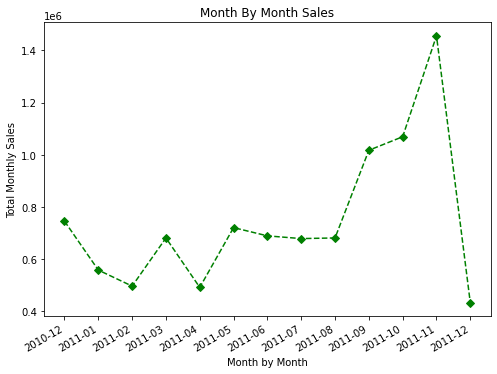

In [25]:
#View Month By Month Sales using line graph
df['Monthly'] = df.loc[:,'InvoiceDate'].dt.to_period('M')
df['Monthly'] = df['Monthly'].astype(str)
MBM=df.groupby('Monthly')['SalePrice'].sum().reset_index()
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(MBM['Monthly'],MBM['SalePrice'],
         marker='D',
         linestyle='--',
         color='g')
plt.title('Month By Month Sales')
plt.xlabel('Month by Month')
fig.autofmt_xdate()
plt.ylabel('Total Monthly Sales')
plt.savefig('MonthByMonthSales.png', bbox_inches='tight')

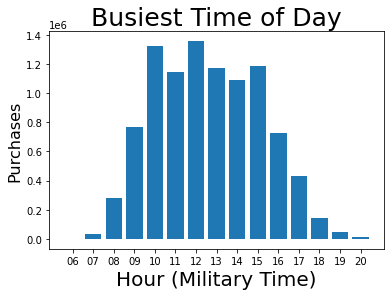

In [49]:
#Discover what time of day had the most purchases using a bar graph
df['Time'] = df.loc[:,'InvoiceDate'].dt.strftime("%H")
TimeDay = df.groupby('Time')['SalePrice'].sum()
plt.bar(TimeDay.index, TimeDay.values)
plt.ylabel('Purchases', fontsize=16)
plt.xlabel('Hour (Military Time)', fontsize=20)
plt.title('Busiest Time of Day', fontsize=25)
plt.savefig('BusiestTime.png', bbox_inches='tight')

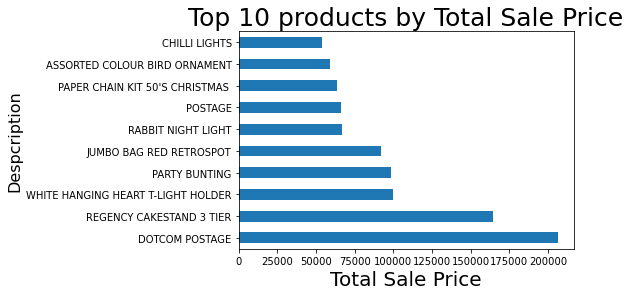

In [50]:
#View Top Ten Products sold by using a horizontal bar graph
top_products = df.groupby('Description')['SalePrice'].sum().nlargest(10)
top_products.plot(kind='barh')
plt.ylabel('Despcription', fontsize=16)
plt.xlabel('Total Sale Price', fontsize=20)
plt.title('Top 10 products by Total Sale Price', fontsize=25)
plt.savefig('Top10products.png', bbox_inches='tight')

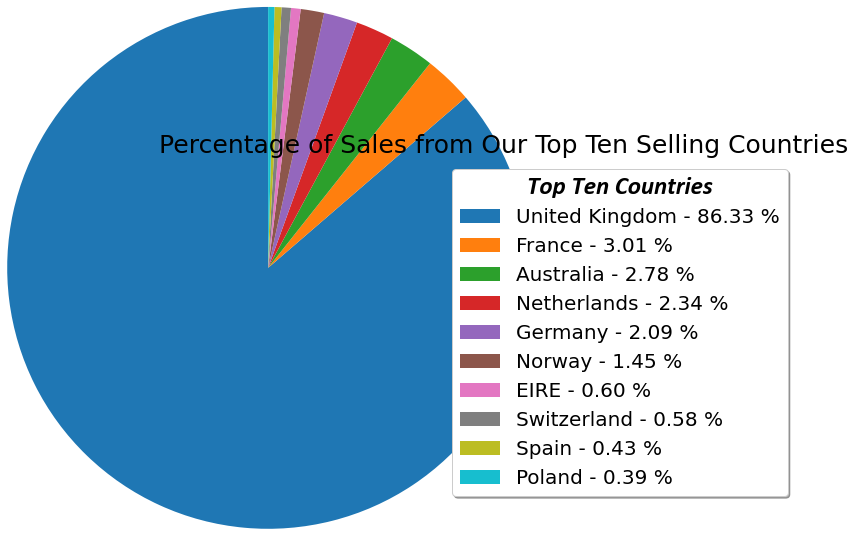

In [47]:
#View percentage of sales from the companies top ten selling countries
x=df.groupby('Country')['SalePrice'].sum().nlargest(10)
y=df.Country.unique()
percent = 100.*x/x.sum()
patches, proxy = plt.pie(x, startangle=90, radius=3)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(y, percent)]

sort_legend = False
if sort_legend:
    patches, labels, proxy_value =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2], 
                                                reverse=True))

font = fm.FontProperties(family='Calibri',
                                   weight='bold',
                                   style='oblique', 
                                   size=25)

plt.title("Percentage of Sales from Our Top Ten Selling Countries",
          loc='left', fontsize=25)

plt.legend(patches, labels, loc=0, bbox_to_anchor=(1.3, 1),
           fontsize=20, title="Top Ten Countries", 
        title_fontproperties=font, shadow=True)

plt.savefig('Top10SellingPieChart.png', bbox_inches='tight')